In [ ]:
from google.colab import drive 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data=pd.read_csv("/content/drive/MyDrive/Freshman First Semester/Research Papers/Wrote/SBAcase.11.13.17[1].csv")
data_copy = data.drop(["Selected", "LoanNr_ChkDgt", "Name", "City", "State", "Zip", "Bank", "BankState", "NAICS", "ApprovalDate", "ChgOffDate", "DisbursementDate", "DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "daysterm"], axis=1)
data_copy.head()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,SBA_Appv,New,RealEstate,Portion,Recession,xx,Default
0,2001,36,1,1.0,0,0,1,0,Y,N,P I F,15000,0,0,0.5,0,16175.0,0
1,2001,56,1,1.0,0,0,1,0,Y,N,P I F,15000,0,0,0.5,1,17658.0,0
2,2001,36,10,1.0,0,0,1,0,Y,N,P I F,15000,0,0,0.5,0,16298.0,0
3,2003,36,6,1.0,0,0,1,0,Y,N,P I F,25000,0,0,0.5,0,16816.0,0
4,2006,240,65,1.0,3,65,1,1,0,N,P I F,343000,0,1,1.0,0,24103.0,0


In [ ]:
data_copy.dtypes

ApprovalFY         int64
Term               int64
NoEmp              int64
NewExist         float64
CreateJob          int64
RetainedJob        int64
FranchiseCode      int64
UrbanRural         int64
RevLineCr         object
LowDoc            object
MIS_Status        object
SBA_Appv           int64
New                int64
RealEstate         int64
Portion          float64
Recession          int64
xx               float64
Default            int64
dtype: object

In [ ]:
data_copy = data_copy[data_copy["ApprovalFY"] >= 2000]
new = []
for i in data_copy["NewExist"].tolist():
  if i == 1.0:
    new.append(0)
  else:
    new.append(1)
data_copy["NewExist2"] = new

franchise = []
for i in data_copy["FranchiseCode"]:
  if i == 1 or 0:
    franchise.append(0)
  else:
    franchise.append(1)
data_copy["Franchise"] = franchise

urban = []
for i in data_copy["UrbanRural"]:
  if i == 1:
    urban.append(1)
  else:
    urban.append(0)
data_copy["Urban"] = urban

revolving = []
for i in data_copy["RevLineCr"]:
  if i == "Y":
    revolving.append(1)
  else:
    revolving.append(0)
data_copy["Revolving"] = revolving

low_doc = []
for i in data_copy["LowDoc"]:
  if i == "N":
    low_doc.append(0)
  else:
    low_doc.append(1)
data_copy["Low_Doc"] = low_doc

data_copy['PIF'] = [
    1 if i == 'P I F' else 0 for i in data_copy['MIS_Status']
]

df = data_copy[["ApprovalFY", "Term", "NoEmp", "Franchise", "Urban", "Revolving", "Low_Doc", "New", "RealEstate", "Portion", "Recession", "Default"]]
#df = data_copy[["Recession", "Portion", "RealEstate", "PIF", "Franchise", "New", "Revolving", "Low_Doc", "NoEmp", "Term", "Urban", "Default"]]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,ApprovalFY,Term,NoEmp,Franchise,Urban,Revolving,Low_Doc,New,RealEstate,Portion,Recession,Default
0,2001,36,1,0,0,1,0,0,0,0.5,0,0
1,2001,56,1,0,0,1,0,0,0,0.5,1,0
2,2001,36,10,0,0,1,0,0,0,0.5,0,0
3,2003,36,6,0,0,1,0,0,0,0.5,0,0
4,2006,240,65,0,1,0,0,0,1,1.0,0,0


In [ ]:
df["ApprovalFY"].value_counts()

2007    404
2006    338
2005    246
2004    228
2003    183
2002    133
2008    123
2001     98
2000     42
2010     36
2009     29
2011     12
2012      1
Name: ApprovalFY, dtype: int64

In [ ]:
df.groupby(["Default"]).mean()

,ApprovalFY,Term,NoEmp,Franchise,Urban,Revolving,Low_Doc,New,RealEstate,Portion,Recession
Default,,,,,,,,,,,
0,2004.595159,156.207012,13.282137,0.231219,0.927379,0.323873,0.012521,0.136895,0.392321,0.702449,0.040902
1,2006.155556,62.417778,4.709630,0.525926,0.908148,0.511111,0.013333,0.160000,0.038519,0.569556,0.117037


In [ ]:
df[df['ApprovalFY'] <= 2007].groupby(["Default"]).mean()

,ApprovalFY,Term,NoEmp,Franchise,Urban,Revolving,Low_Doc,New,RealEstate,Portion,Recession
Default,,,,,,,,,,,
0,2004.139042,157.360037,13.796501,0.177716,0.928177,0.320442,0.011971,0.134438,0.401473,0.700170,0.044199
1,2005.829352,61.604096,4.813993,0.479522,0.904437,0.515358,0.008532,0.162116,0.042662,0.556485,0.131399


In [ ]:
df[df["ApprovalFY"].isin(np.arange(2008, 2010))].groupby(["Default"]).mean()

,ApprovalFY,Term,NoEmp,Franchise,Urban,Revolving,Low_Doc,New,RealEstate,Portion,Recession
Default,,,,,,,,,,,
0,2008.242857,124.342857,6.442857,0.600000,0.942857,0.428571,0.00000,0.157143,0.214286,0.686429,0.014286
1,2008.146341,66.024390,4.182927,0.817073,0.951220,0.500000,0.04878,0.146341,0.012195,0.645122,0.024390


In [ ]:
df[df["ApprovalFY"].isin(np.arange(2010, 2013))].groupby(["Default"]).mean()

,ApprovalFY,Term,NoEmp,Franchise,Urban,Revolving,Low_Doc,New,RealEstate,Portion,Recession
Default,,,,,,,,,,,
0,2010.309524,179.500000,11.380952,1.0,0.880952,0.238095,0.047619,0.166667,0.452381,0.788095,0.0
1,2010.142857,88.285714,2.142857,1.0,0.714286,0.285714,0.000000,0.142857,0.000000,0.778571,0.0


SKLearn

In [ ]:
x = df.drop(["Default", "ApprovalFY"], axis=1)
y = df["Default"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101, stratify=y, test_size=0.2)

In [ ]:
x_train.shape, x_test.shape

((1498, 10), (375, 10))

In [ ]:
y_train.shape, y_test.shape

((1498,), (375,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeClassifier(random_state=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
def exp(df, sims):
  lst = []
  for i in range(0, sims):
    training_data = df.sample(int(np.round(0.8*len(df))))
    testing_data = df.drop(training_data.index)

    x_train = training_data.drop(["Default", "Term", "Portion"], axis=1)
    y_train = training_data["Default"]
    x_test = testing_data.drop(["Default", "Term", "Portion"], axis=1)
    y_test = testing_data["Default"]

    dt = DecisionTreeClassifier(random_state=10)
    dt.fit(x_train, y_train)

    lst.append(dt.score(x_test, y_test))
  plt.hist(lst, edgecolor="black", bins = np.arange(0.86, 0.98, 0.01))
  plt.xlabel("Testing Accuracy")
  plt.ylabel("Simulations")
  plt.title("1000 Simulations of Tree Classifier on Test Accuracy")

In [ ]:
#exp(df, 1000)

In [ ]:
dt.score(x_train, y_train)

0.9959946595460614

In [ ]:
dt.score(x_test, y_test)

0.9173333333333333

In [ ]:
from sklearn import tree

In [ ]:
#!pip install graphviz

In [ ]:
decision_tree = tree.export_graphviz(dt, out_file="sba_tree.dot", feature_names=x_train.columns, max_depth=4, filled=True)

In [ ]:
!dot -Tpng sba_tree.dot -o sba_tree.png

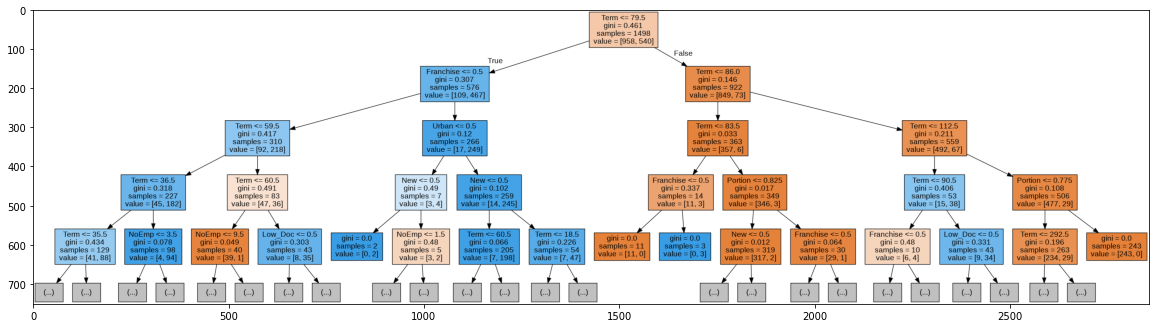

In [ ]:
img = plt.imread("sba_tree.png")
plt.figure(figsize=(20, 20))
plt.imshow(img)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = confusion_matrix(dt.predict(x_test), y_test, labels=[1,0])
print('Confusion matrix : \n', matrix)
print("Accuracy: \n", (121+223)/(121+223+14+17))

Confusion matrix : 
 [[121  17]
 [ 14 223]]
Accuracy: 
 0.9173333333333333


SKLearn Validation

In [ ]:
test_accuracy = []
for depth in np.arange(1, 41):
  model = DecisionTreeClassifier(max_depth=depth, random_state=10)
  model.fit(x_train, y_train)
  test_accuracy.append(model.score(x_test, y_test))

In [ ]:
accuracy_frame = pd.DataFrame({"max_depth": np.arange(1, 41), "accuracy":test_accuracy})
accuracy_frame

,max_depth,accuracy
0,1,0.874667
1,2,0.874667
2,3,0.896000
3,4,0.898667
4,5,0.922667
5,6,0.930667
6,7,0.925333
7,8,0.933333
8,9,0.917333
9,10,0.925333


0.9333333333333333

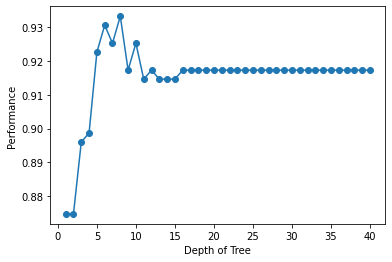

In [ ]:
plt.plot(accuracy_frame["max_depth"], accuracy_frame["accuracy"], marker="o")
plt.xlabel("Depth of Tree")
plt.ylabel("Performance")
max(accuracy_frame["accuracy"])

Text(0, 0.5, 'Test Accuracy')

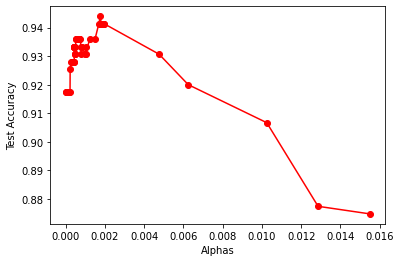

In [ ]:
path = dt.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]
dt_list = []

for alpha in ccp_alphas:
  dtx = DecisionTreeClassifier(random_state=10, ccp_alpha=alpha)
  dtx.fit(x_train, y_train)
  dt_list.append(dtx)

test_accuracy = [dtx.score(x_test, y_test) for dtx in dt_list]
plt.plot(ccp_alphas, test_accuracy, marker="o", color="r")
plt.xlabel("Alphas")
plt.ylabel("Test Accuracy")

In [ ]:
dt2 = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=25, random_state=10, ccp_alpha=0.002)
dt2.fit(x_train, y_train)
dt2.score(x_test, y_test)

0.92

[Text(0.5714285714285714, 0.9166666666666666, 'Term <= 79.5\ngini = 0.461\nsamples = 1498\nvalue = [958, 540]\nclass = No Default'),
 Text(0.42857142857142855, 0.75, 'Franchise <= 0.5\ngini = 0.307\nsamples = 576\nvalue = [109, 467]\nclass = Default'),
 Text(0.35714285714285715, 0.5833333333333334, 'Term <= 59.5\ngini = 0.417\nsamples = 310\nvalue = [92, 218]\nclass = Default'),
 Text(0.21428571428571427, 0.4166666666666667, 'Term <= 36.5\ngini = 0.318\nsamples = 227\nvalue = [45, 182]\nclass = Default'),
 Text(0.14285714285714285, 0.25, 'Term <= 35.5\ngini = 0.434\nsamples = 129\nvalue = [41, 88]\nclass = Default'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.259\nsamples = 98\nvalue = [15, 83]\nclass = Default'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.271\nsamples = 31\nvalue = [26, 5]\nclass = No Default'),
 Text(0.2857142857142857, 0.25, 'gini = 0.078\nsamples = 98\nvalue = [4, 94]\nclass = Default'),
 Text(0.5, 0.4166666666666667, 'Term <= 60.5\ngi

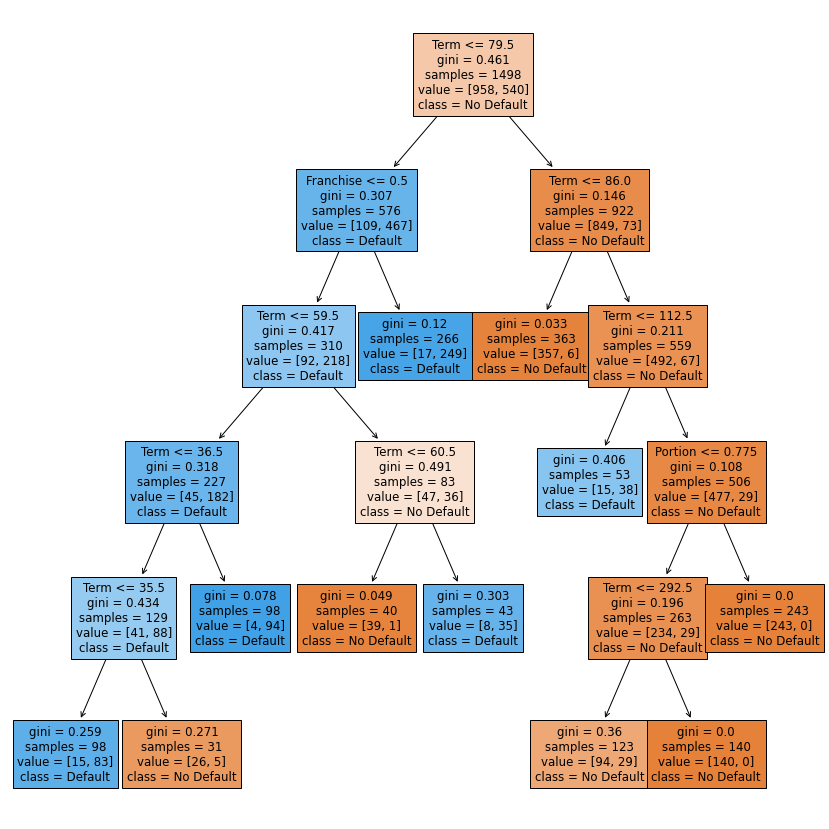

In [ ]:
decision_tree = tree.export_graphviz(dt2, out_file="sba_tree2.dot", feature_names=x_train.columns, max_depth=5, filled=True)
!dot -Tpng sba_tree2.dot -o sba_tree2.png
img = plt.imread("sba_tree2.png")
plt.figure(figsize=(15, 15))
plt.imshow(img)
tree.plot_tree(dt2,
               feature_names = x_train.columns, 
               class_names=["No Default", "Default"],
               filled = True)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = confusion_matrix(dt2.predict(x_test), y_test, labels=[1,0])
print('Confusion matrix : \n', matrix)
#18 is false positives (predicted it would default but it did not), 4 is false negatives (predicted would not default but it did)
#model correctly classified 131 instances when the loan actually did default and 222 instances when the loan did not default

print("Accuracy : \n", (131+222)/(130+222+22))

Confusion matrix : 
 [[125  20]
 [ 10 220]]
Accuracy : 
 0.9438502673796791


In [ ]:
x_test_copy = x_test.copy()
x_test_copy["Predictions"] = dt2.predict(x_test)
x_test_copy["Actual"] = y_test
#x_test_copy[(x_test_copy["Predictions"] == 1) & (x_test_copy["Actual"] == 0)]

Descriptive Values/Statistics/Graphs

In [ ]:
df.describe()

,ApprovalFY,Term,NoEmp,Franchise,Urban,Revolving,Low_Doc,New,RealEstate,Portion,Recession,Default
count,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000
mean,2005.157501,122.406834,10.192739,0.337427,0.920448,0.391351,0.012814,0.145222,0.264816,0.654557,0.068340,0.360384
std,2.268624,92.835888,36.093846,0.472958,0.270670,0.488183,0.112500,0.352418,0.441353,0.187696,0.252395,0.480240
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.382369,0.000000,0.000000
25%,2004.000000,59.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
50%,2006.000000,84.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
75%,2007.000000,240.000000,8.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.750000,0.000000,1.000000
max,2012.000000,306.000000,650.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
len(df[df["Default"] == 1]) / len(df["Default"])
#36% of all approved loans defaulted

0.3603844100373732

In [ ]:
yes_real_estate = df[df["RealEstate"] == 1]
yes_re = len(yes_real_estate[yes_real_estate["Default"] == 1]) / len(yes_real_estate["Default"])

no_real_estate = df[df["RealEstate"] == 0]
no_re = len(no_real_estate[no_real_estate["Default"] == 1]) / len(no_real_estate["Default"])
print(yes_re, no_re)

0.05241935483870968 0.4713144517066086


In [ ]:
yes_real_estate = df[df["Recession"] == 1]
yes_rec = len(yes_real_estate[yes_real_estate["Default"] == 1]) / len(yes_real_estate["Default"])

no_real_estate = df[df["Recession"] == 0]
no_rec = len(no_real_estate[no_real_estate["Default"] == 1]) / len(no_real_estate["Default"])
print(yes_rec, no_rec)
print(len(df[df["Recession"] == 1]) / len(df))

0.6171875 0.34154727793696277
0.06833956219967965


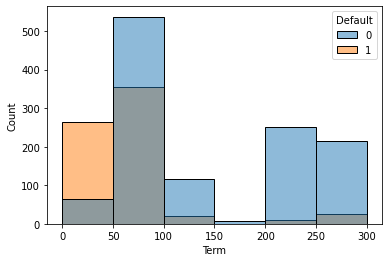

In [ ]:
sns.histplot(data=df, x='Term', bins=np.arange(0, 350, 50), hue="Default")

Bootstrapping

In [ ]:
from statsmodels.stats.proportion import proportions_ztest as ztest
import statistics
import random
from random import sample
from random import choice

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def bootstrap(table, attribute):
  arr = []
  for i in np.arange(1, 1001):
    bootstrap = np.random.choice(table[attribute].tolist(), len(table[attribute]), replace=True)
    bootstrap_mean = np.mean(bootstrap)
    arr.append(bootstrap_mean)
  lower = np.percentile(arr, 2.5)
  upper = np.percentile(arr, 97.5)
  return [lower, upper]

In [ ]:
default = df[df["Default"] == 1]
no_default = df[df["Default"] == 0]

In [ ]:
print("95% CI for portion covered by SBA for loans that defaulted: ", bootstrap(default, "Portion"))
print("95% CI for portion covered by SBA for loans that did not default: ", bootstrap(no_default, "Portion"))

95% CI for portion covered by SBA for loans that defaulted:  [0.560146294911074, 0.5794074046014445]
95% CI for portion covered by SBA for loans that did not default:  [0.6912734506517321, 0.7139393504769616]


In [ ]:
print("95% CI for terms for SBA loans that defaulted: ", bootstrap(default, "Term"))
print("95% CI for terms for SBA for loans that did not default: ", bootstrap(no_default, "Term"))

95% CI for terms for SBA loans that defaulted:  [58.662592592592596, 66.37551851851852]
95% CI for terms for SBA for loans that did not default:  [150.9107262103506, 161.58134390651085]


In [ ]:
print("95% CI for defaulted loans that included real estate as collateral: ", bootstrap(default, "RealEstate"))
print("95% CI for non-defaulted loans that included real estate as collateral: ", bootstrap(no_default, "RealEstate"))

95% CI for defaulted loans that included real estate as collateral:  [0.025185185185185185, 0.05333333333333334]
95% CI for non-defaulted loans that included real estate as collateral:  [0.3672787979966611, 0.41819699499165275]


In [ ]:
print("95% CI for number of people employed for a business that defaulted: ", bootstrap(default, "NoEmp"))
print("95% CI for number of people employed for a business that did not default: ", bootstrap(no_default, "NoEmp"))

95% CI for number of people employed for a business that defaulted:  [4.205888888888889, 5.260777777777778]
95% CI for number of people employed for a business that did not default:  [10.896181135225374, 15.958326377295492]


Tensorflow

In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

In [ ]:
#import tensorflow as tf
#tf.random.set_seed(42)

#model = tf.keras.Sequential([
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dense(1, activation='sigmoid')
#])

#model.compile(
    #loss=tf.keras.losses.binary_crossentropy,
    #optimizer=tf.keras.optimizers.Adam(lr=0.03),
    #metrics=[
        #tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        #tf.keras.metrics.Precision(name='precision'),
        #tf.keras.metrics.Recall(name='recall')
    #]
#)

In [ ]:
#classifier = model.fit(x_train_scaled, y_train, epochs=20)

In [ ]:
#probabilities = model.predict(x_test_scaled)
#predictions = [
    #1 if prob > 0.5 else 0 for prob in np.ravel(probabilities)
#]

In [ ]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score

#print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')
#print(f'Precision: {precision_score(y_test, predictions):.2f}')
#print(f'Recall: {recall_score(y_test, predictions):.2f}')